In [1]:
import matplotlib
#%matplotlib widget 

In [2]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import mplcursors
mplcursors.cursor(hover=True)

In [3]:
alliances = pd.read_csv('../data/alliance_ff.csv')

In [4]:
alliance_membership = pd.read_csv('../data/alliance_membership.csv')

In [54]:
messages1 = pd.read_csv('../data/chat_messages_1_fixed.csv')
messages2 = pd.read_csv('../data/chat_messages_2_fixed.csv')
messages = pd.concat([messages1, messages2]).dropna()
messages['filterted'] = messages.filtered.astype(float)
messages.timestamp = pd.to_datetime(messages.timestamp)

/tmp/ipykernel_83492/4103631880.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  messages2 = pd.read_csv('../data/chat_messages_2_fixed.csv')


In [127]:
accounts = pd.read_csv('../data/accounts.csv')

In [131]:
accounts

,account_id,alliance_id,session_count,session_duration,transaction_count,revenue,date,active,account_state,last_active_date,level,created_language,created_country_code,created_time,session_count_today,session_duration_today,transaction_count_today,revenue_today,last_login_game_client_language,last_login_country_code
0,e10cd6ddf379b98c52e59529026359ad80e53ebecd38cd...,7f87a7d72c4038b8845735c772a0407cb58d4a443508d1...,492,1.197445e+06,0,0.00,2023-03-01,True,3,2023-03-01,33.0,en-GB,IN,2022-06-30 09:57:13.976,2,5275.434000,0,0.0,en-IN,IN
1,592103594bc6e660e1d0caa9e046d7b7f6da3eede4e893...,beb86b8e68696fb10c3b3c55898a495568579cc17e2eb4...,536,4.138838e+05,0,0.00,2023-03-01,True,3,2023-03-01,31.0,en-GB,IN,2021-11-26 14:20:32.716,3,1691.798000,0,0.0,en-IN,IN
2,7be671feb8066897a6292e03e520aa4ffbc9cae00ffe99...,61b3a23ded0bdd6d3df3d0d7f741af2eb48e6f9bc662dc...,1115,5.606682e+05,0,0.00,2023-03-01,True,3,2023-03-01,32.0,en-GB,IN,2021-06-30 09:22:12.642,14,4192.960001,0,0.0,en-IN,IN
3,0cea88f4366301f6c58f45d131180aeb6108df7820f3cc...,a4979799f92bcec14255788a66d24be68de82c8afa1252...,2076,1.303385e+06,0,0.00,2023-03-01,True,3,2023-03-01,38.0,en-GB,IN,2021-08-20 06:40:01.696,3,5331.243000,0,0.0,en-GB,IN
4,57eb9194ccc208704bf991dd56a5cb3fff63c9b0ce61f6...,546c74e081f1d793ad223ac6ac4cedf226b0a4d285fae2...,1908,1.461803e+06,0,0.00,2023-03-01,True,3,2023-03-01,35.0,en-GB,IN,2022-05-26 13:10:14.224,10,3949.426000,0,0.0,en-GB,IN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130132,0b3dc5e1e27efe270d4efc35d0c45431ea776c88dc0765...,b981c6e1505f98aece038f634159bcb88fe4165a6f8436...,1455,9.503963e+05,2,9.98,2023-03-01,True,3,2023-03-01,29.0,en-CA,CA,2018-03-04 03:20:04.025,1,795.201000,0,0.0,en-CA,CA
130133,514ec922ee48e22eb15084fab3cbf88f817e4030edec05...,569c41f38d9d1fd8a421615b54edc58ad09d4ecc554da9...,15029,5.437979e+06,1,0.99,2023-03-01,True,3,2023-03-01,50.0,en-CA,CA,2018-12-16 19:29:01.851,9,3150.533000,0,0.0,en-CA,CA
130134,52837ef4e11812234cf93ead2d84eef2ce7cd881e915a4...,6f09682eb5d3c6bbe3a7bee1f35e594da10f0565260362...,2128,9.727380e+05,6,21.94,2023-03-01,True,3,2023-03-01,35.0,es-ES,ES,2019-07-02 13:53:03.668,23,16816.713000,0,0.0,es-ES,ES
130135,da1afdf5015045c8875c33d7cef8c8be8603c0ea024af7...,ebcf7976b86d091e46a503ad0767e1dcd2490eb4f81bf2...,2212,1.247516e+06,0,0.00,2023-03-01,True,3,2023-03-01,34.0,es-US,MX,2022-04-28 01:27:44.066,5,1826.763000,0,0.0,es-US,MX


In [55]:
alliance_size = alliance_membership.groupby('alliance_id')['size'].mean()

## Mean Sentiments all Messages

<Axes: title={'center': 'Mean Sentiments'}>

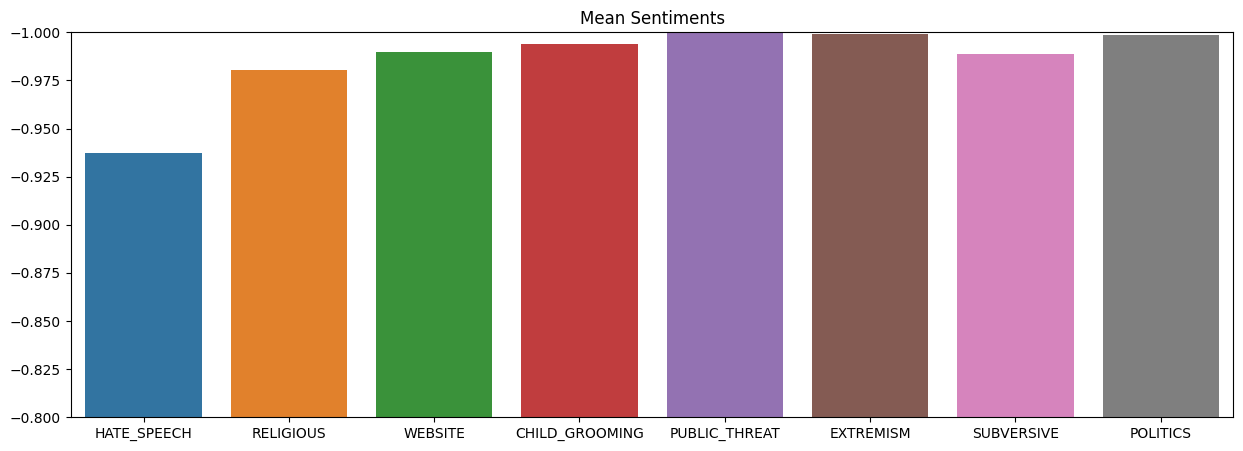

In [56]:
categories = messages[['HATE_SPEECH', 'RELIGIOUS', 'WEBSITE', 'CHILD_GROOMING', 'PUBLIC_THREAT', 'EXTREMISM', 'SUBVERSIVE', 'POLITICS']].mean()
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylim([-0.8, -1.0])
ax.set_title('Mean Sentiments')
sb.barplot(ax=ax, x=categories.index, y=categories)

## Over all chats distributions of different hate speech strength

<Axes: xlabel='HATE_SPEECH', ylabel='Count'>

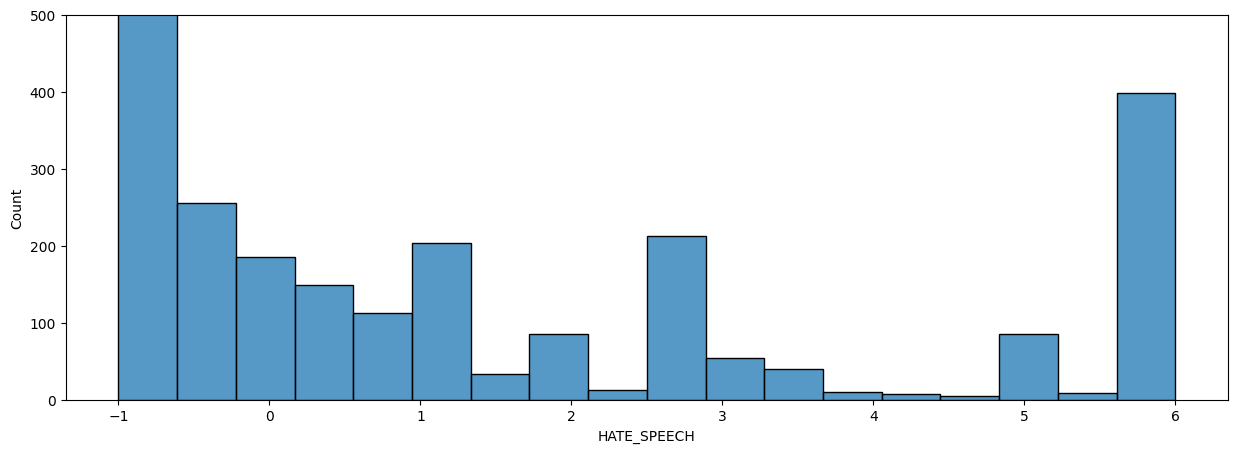

In [57]:
categories = messages[['alliance_id', 'HATE_SPEECH', 'RELIGIOUS', 'WEBSITE', 'CHILD_GROOMING', 'PUBLIC_THREAT', 'EXTREMISM', 'SUBVERSIVE', 'POLITICS']]
alliance_cats = categories.groupby('alliance_id')
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylim([0, 500])
sb.histplot(alliance_cats['HATE_SPEECH'].mean())

## Hate speech strength vs. alliance size (far right might only be single hate speech message in a big group)

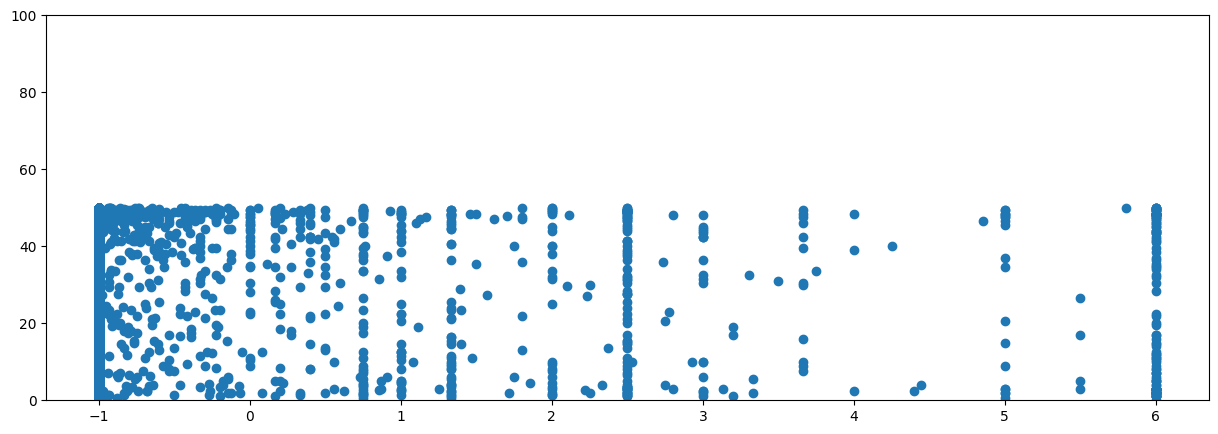

In [58]:
alliance_cats = categories.groupby('alliance_id')
hs_mean = alliance_cats['HATE_SPEECH'].mean()
#data['alliance_size'] = alliance_size
data = pd.DataFrame({'hs_mean':hs_mean, 'alliance_size':alliance_size})
data = data.dropna()
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylim([0, 100])
plt.scatter(data['hs_mean'], data['alliance_size'])

## Hate speech per alliance vs number of messages in this alliance 

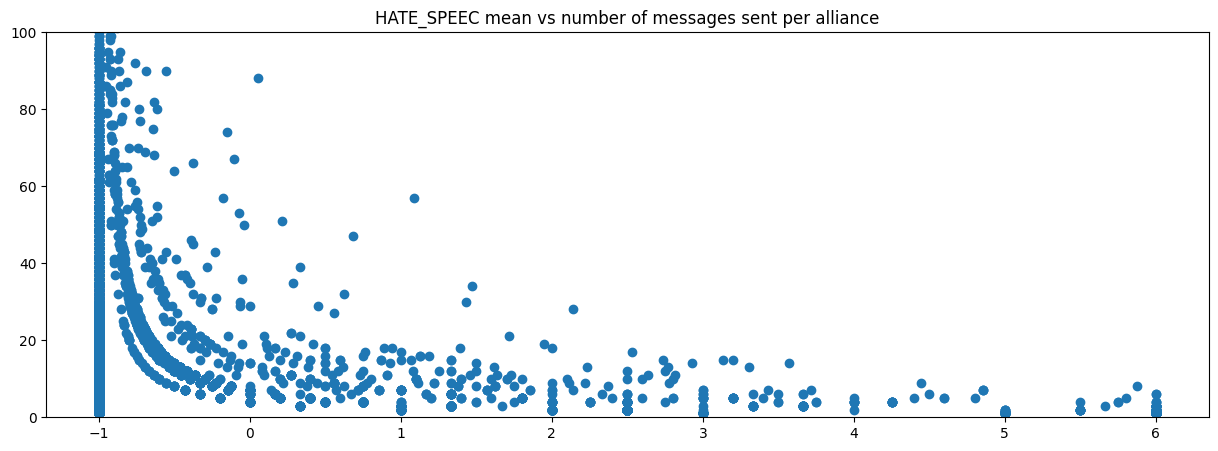

In [59]:
alliance_cats = categories.groupby('alliance_id')
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylim([0, 100])
ax.set_title('HATE_SPEEC mean vs number of messages sent per alliance')
plt.scatter(alliance_cats['HATE_SPEECH'].mean(), alliance_cats['HATE_SPEECH'].count())

<Axes: xlabel='hs_mean', ylabel='num_messages'>

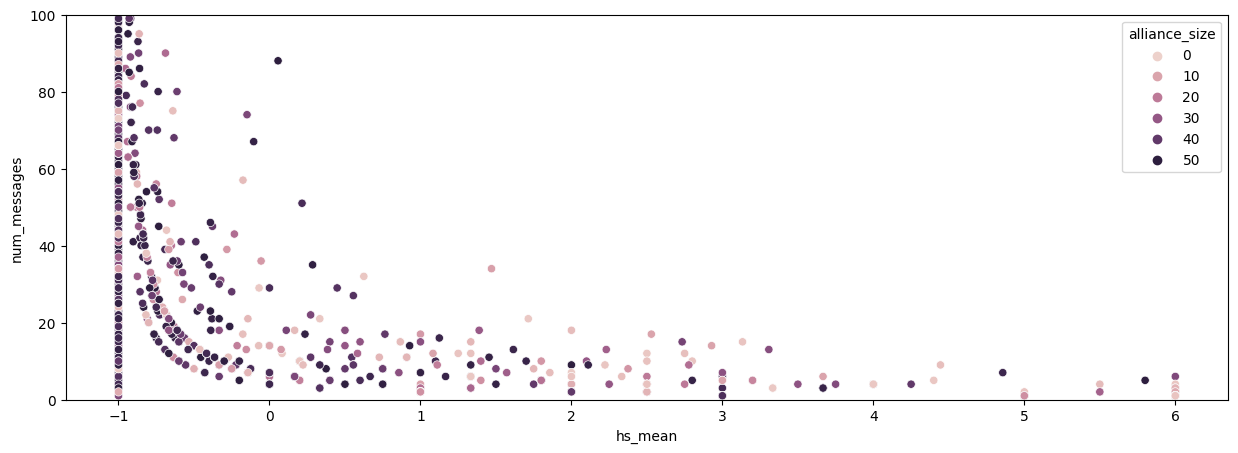

In [60]:
alliance_cats = categories.groupby('alliance_id')
data = pd.DataFrame({'hs_mean':alliance_cats['HATE_SPEECH'].mean(), 'num_messages':alliance_cats['HATE_SPEECH'].count(), 'alliance_size':alliance_size})
data = data.dropna()
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylim([0, 100])
sb.scatterplot(data=data,x='hs_mean', y='num_messages', hue='alliance_size', ax=ax)

In [132]:
data[(data.hs_mean >= 2) & (data.num_messages>=15) & (data.alliance_size>=30)]

,hs_mean,num_messages,alliance_size
alliance_id,,,
5bb44180ae3a20f38b38d07a3b987c3e55945f6c2d501338e53ff577221e8329,2.733333,15.0,36.0


In [62]:
cat_means = messages[['HATE_SPEECH', 'RELIGIOUS', 'WEBSITE', 'CHILD_GROOMING', 'PUBLIC_THREAT', 'EXTREMISM', 'SUBVERSIVE', 'POLITICS']].mean()
cat_vars = messages[['HATE_SPEECH', 'RELIGIOUS', 'WEBSITE', 'CHILD_GROOMING', 'PUBLIC_THREAT', 'EXTREMISM', 'SUBVERSIVE', 'POLITICS']].var()

In [63]:
grp = messages[messages.alliance_id=='23f31d22f6a302db33f9d35fc1a779bce1c0e628a9d87fca5d52d77b1e2e00c4']
grp[['HATE_SPEECH', 'RELIGIOUS', 'WEBSITE', 'CHILD_GROOMING', 'PUBLIC_THREAT', 'EXTREMISM', 'SUBVERSIVE', 'POLITICS']].mean()

HATE_SPEECH       1.388889
RELIGIOUS        -1.000000
WEBSITE          -1.000000
CHILD_GROOMING   -1.000000
PUBLIC_THREAT    -1.000000
EXTREMISM        -1.000000
SUBVERSIVE       -1.000000
POLITICS         -1.000000
dtype: float64

In [64]:
messages.filtered.astype(float).unique()

array([0., 1.])

In [72]:
def print_alliance_messages(alliance_id):
    group_messages = messages[messages.alliance_id ==alliance_id]
    group_messages = group_messages.sort_values('timestamp')
    accounts = messages
    for i, msg in group_messages.iterrows():
        print(msg.raw_message, msg.filtered_message)

In [73]:
print_alliance_messages('6dad00c20f6df7cbeeb5b884de21fb9cb7d5f80a2607bf3dc864c46aeeffac82')

it will come it will come
is it hard to raise chickens is it hard to raise chickens
eggt eggt
never had one like to try never had one like to try
I want a ostrich egg I want a ostrich egg
I've tried a lot of wild game but never a quail egg or ostrich egg I've tried a lot of wild game but never a quail egg or ostrich egg
I'm with you sparty. I'll stay here until it becomes more chore than fun. it's not that much extra loot I'm with you sparty. I'll stay here until it becomes more chore than fun. it's not that much extra loot
Caboom sorry work issues came up Caboom sorry work issues came up
Chickens or eggs. Never go to Tractor Supply co for eggs or chickens Chickens or eggs. Never go to Tractor Supply co for eggs or chickens
what’s the promise egg? what’s the promise egg?
you deserve it buddy you deserve it buddy
a lot of coon and opossum a lot of **** and opossum
really can't say coon really can't say ****
raccoon raccoon
Coons *****
yep yep
Koons and possums ***** and possums
I'm a cr

In [76]:
alliance_membership[alliance_membership.alliance_id=='6dad00c20f6df7cbeeb5b884de21fb9cb7d5f80a2607bf3dc864c46aeeffac82']

,account_id,alliance_id,timestamp,date,action,size,max_size
26339,f9c5da57307b09928626cf51e642f045457a206fd9b6b0...,6dad00c20f6df7cbeeb5b884de21fb9cb7d5f80a2607bf...,20230301T224922.631Z,2023-03-01,join,50,50


In [89]:
actions = alliance_membership.groupby('alliance_id')['action'].count()
actions.sort_values(ascending=False).iloc[:20]

alliance_id
bc4c1c692638efa4a9ff139e82e87e9d79d247816350840197d3f0a7ef6d1ba7    174
588766134ff8471a581afd8fbdb981305891f170e55572b39a72e2c265287375    163
8e597100933e8b5a1390072dab51abcad340c9e7a2bc2dfa5e52de9fd2869fb6    103
ea7c21c4393133450f5f0613acf9a03bdacb679da45f21bb6b42e0d60e406af9     96
b6b227ab762e8ff6fa6a46de73d5f387f4c1d00f423808e801b57af1dbe0145c     90
23c418cc661bbdb8df3b67e20862a6f8e32bf22ac56be0239a8cf2495c689da9     81
6026b8f51800cd45d44e63d31a7fa2fb455ba6c0991c3913597040f9e0d18b64     76
1283c5eac60d3a9c2c888742e228531f0884a9411dc40eaeda4f66057d9b89fa     75
46df7090c8d12ea2e9b9445803fccdbb51cfacdd5d25238ce919441fed095399     72
f129458bff0613e5624147ffb76b0923856739fa1c0844a5718dae6a8eeb1ee5     71
eb10a18469110f2fd1db3e5c51b6ef4ee834938c7337d957425cf522d1dd17dc     66
a43c6419d438a1e2a4b5cd41b1fc34ac11df2bcc6c1ee4b3b483f0f768c80fbe     64
92960e5904d7883889ed0f80efa4668fb01ca39c2f69b8f4a6ca56791919d4dd     64
37c20a13b5bc7e658716a3d6e272cca0ee5b6492a7672e90883e

In [ ]:
allia

In [90]:
alliance_membership[alliance_membership.alliance_id=='6dad00c20f6df7cbeeb5b884de21fb9cb7d5f80a2607bf3dc864c46aeeffac82']

,account_id,alliance_id,timestamp,date,action,size,max_size
26339,f9c5da57307b09928626cf51e642f045457a206fd9b6b0...,6dad00c20f6df7cbeeb5b884de21fb9cb7d5f80a2607bf...,20230301T224922.631Z,2023-03-01,join,50,50


In [27]:
messages[messages.alliance_id == '5bb44180ae3a20f38b38d07a3b987c3e55945f6c2d501338e53ff577221e8329'].account_id.unique()

array(['98149bd911daf266d0ae029599c78a4f885bf30f125f31658d129e9063b27e03',
       'fd4382f5c4795425e6e98a60de70682085ef6104bcb291948153f3f4ff745140',
       '4d3a166b3cf8c8b052803517a0e64e557d18a867ffde3cd4b90ff292f6d808b1',
       '468da748400dfabeaec9ddb3d22db45a4f6d6c24cdffb9d842e8229146b42c69',
       '5f8f06982f01b39f5cf269cf40f01d5fa14a24d4124f91bc9f44099056c45468'],
      dtype=object)

In [34]:
nazi_accounts = ['98149bd911daf266d0ae029599c78a4f885bf30f125f31658d129e9063b27e03',
       'fd4382f5c4795425e6e98a60de70682085ef6104bcb291948153f3f4ff745140',
       '4d3a166b3cf8c8b052803517a0e64e557d18a867ffde3cd4b90ff292f6d808b1',
       '468da748400dfabeaec9ddb3d22db45a4f6d6c24cdffb9d842e8229146b42c69',
       '5f8f06982f01b39f5cf269cf40f01d5fa14a24d4124f91bc9f44099056c45468']

messages[messages.account_id.isin(nazi_accounts)]["alliance_id"].unique()

array(['5bb44180ae3a20f38b38d07a3b987c3e55945f6c2d501338e53ff577221e8329'],
      dtype=object)

In [63]:
risky = messages[messages.risk > 3]
risky_groups = risky.groupby('alliance_id').count()
risky_groups[risky_groups.account_id > 20]

,account_id,timestamp,date,raw_message,filtered_message,filtered,filtered_content,risk,filter_detected_language,is_family_friendly,...,FRAUD,HATE_SPEECH,RELIGIOUS,WEBSITE,CHILD_GROOMING,PUBLIC_THREAT,EXTREMISM,SUBVERSIVE,SENTIMENT,POLITICS
alliance_id,,,,,,,,,,,,,,,,,,,,,
056e4a1ee5f5b2f35ad3d7996269980c2026330a77822ca01495a2b895b83f87,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
15a1b0e15ebdfeb81100492b11d57b22864d8c33519dec5b50b33f8986546824,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
2b7a01151f9c1901ee3cd4594f1fe487eccc14b0b524f0481a8e810a33a30f54,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
33ee5412c3d0ffe911e465784aa88d4bdb44057ed093f3ed3b1d43b7d4b854e4,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
37ebcdbc513d0a055cf94c422015a7e0b057d79d57734cf34ad79f2d12df0bb3,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
38f06fe05b0d3585c82ce43331dc47c4b927fb9493249d1f879e9b2e5b0f5011,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
404093e4de5709f16f8096aa237f9f7f2106c76e198f1d18729774d1e3e5db54,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
43ac0e23569c376819e2d1bc2f79c60d9e0d3532a0152d0fc50115e97a1b7532,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
5735955f372580a1d42141fa110c95225b67fdf423e5ec8a74543c37dd8b17d4,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32


In [61]:
risky_groups

,account_id,timestamp,date,raw_message,filtered_message,filtered,filtered_content,risk,filter_detected_language,is_family_friendly,...,FRAUD,HATE_SPEECH,RELIGIOUS,WEBSITE,CHILD_GROOMING,PUBLIC_THREAT,EXTREMISM,SUBVERSIVE,SENTIMENT,POLITICS
alliance_id,,,,,,,,,,,,,,,,,,,,,
00000709d10b0d23ece5003a93f0ccef17561d8834553cbbbf631058d46975a7,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
00006728d51965d89166234abf9a67f824836777587b82f4c98791f417a52e83,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
000ad794664e4a07fcaf0a2e43f38e371e8757c805833a1ff23fe51dd232b4e7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
000dbb0fe0843e50b13030b5c5045e9d582012cf2f0962904f74cc334379a023,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
000f62f0f7c1c2802701586e2ce4def5cae0aba253a51f10eb43eea221a25065,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffe46f9a09dc1aacc9624bd61710abc5c77cf02588b6f78396091b40dfcde064,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ffe7138874b49afab24b006fa15147e742f9dc2e83faed961ba663417e6ebca6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
fff63fd1634dd7db5744b6958c0055ee1fad8a49722b3273c749ef90b948e476,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [27]:
messages1.iloc[5605].raw_message

'"oops,forgot to say ""important"""'

In [11]:
alliance_membership.groupby('account_id').count()

,alliance_id,timestamp,date,action,size,max_size
account_id,,,,,,
0000e7f280a1a273174240513410d3538d0ad2ad77d7794066b0cb8cf1e5cd97,4,4,4,4,4,4
0002d70ca9f02320c4b873884a8cf78f164ea04741c7556687044277509a12a1,2,2,2,2,2,2
000622077dd8fb866647e4c02011454ce350698afbb21f3206cccd869c59bfa3,1,1,1,1,1,1
0009ae72ba2810806d063840f22797ff0fddda2b758d8d3e08458783ee81ed20,1,1,1,1,1,1
0015f9fbb8966a48e5f78e594bd8ac836ba9aa6cd77ff5fec0b5165500135a7f,2,2,2,2,2,2
...,...,...,...,...,...,...
ffebc7928782ecb404fd888dd0e2849b0425d9c7cc309cec1e2a0e0bc7e5ae71,2,2,2,2,2,2
fff56761989dfe82f7b84341f828e2cb80b105094c2f1599894e018388587de5,3,3,3,3,3,3
fffb4d64336538c43e04fdc1ad7b3a66efa42654947e13d472d83131659ba88e,1,1,1,1,1,1
